In [1]:
%pylab inline
from __future__ import division
import scipy as sp
from scipy import stats
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
import operator as op
from decimal import *
import pickle
import mpld3
mpld3.enable_notebook()

Populating the interactive namespace from numpy and matplotlib


In [7]:
%run ../cow.py
%run ../optimize_pkg.py

In [3]:
protocol_target = 10**(-9)
rx_SNR_range = arange(0, 12, 0.01)
tx_SNR_range = arange(0, -10*log10(protocol_target), 0.01)
protocolbit = 4*10**4
user_range = arange(2, 36, 1)

In [4]:
filepath_down = "../data_tables/shannon_tables/n"
filepath_up = "../data_tables/shannon_tables/n"
extension = ".in"

# Optimize 1

In [5]:
%%time
optimize_1_data = zeros((34, 5))
for N in user_range:
    optimize_1_data[N-user_range[0]] = optimize_1(N, rx_SNR_range, tx_SNR_range, filepath_down, filepath_up, protocolbit)

CPU times: user 1min 19s, sys: 674 ms, total: 1min 20s
Wall time: 1min 20s


[[ -1.64900000e+01   3.09000000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [ -1.47000000e+01   1.86400000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [ -1.34300000e+01   1.27200000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [ -1.24300000e+01   9.31000000e+00   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [ -1.16200000e+01   7.11000000e+00   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [ -1.09200000e+01   5.63000000e+00   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [ -1.03200000e+01   4.56000000e+00   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [ -9.78000000e+00   3.78000000e+00   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [ -9.30000000e+00   3.18000000e+00   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [ -8.86000000e+00   2.72000000e+00   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [ -8.46000000e+00   2.36000000e+00   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [ -8.0900

//anaconda/envs/conda2/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
//anaconda/envs/conda2/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


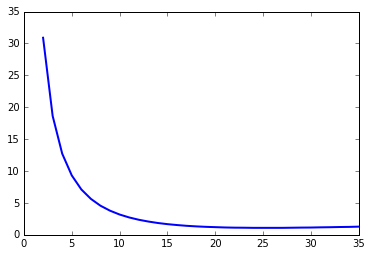

In [6]:
print optimize_1_data
plot(user_range, optimize_1_data[:,1], lw=2.0)

# Optimize 3

In [8]:
%%time
optimize_3_data = zeros((34, 5))
for N in user_range:
    print "=== N {0} ===".format(N)
    optimize_3_data[N-user_range[0]] = optimize_3(N, rx_SNR_range, tx_SNR_range, filepath_down, filepath_up, protocolbit)
    print optimize_3_data[N-user_range[0]]
    
# print optimize_3_data

=== N 2 ===
[   -16.4            30.99        13333.33333333  13333.33333333
  13333.33333333]
=== N 3 ===
[   -14.7            18.64        13333.33333333  13333.33333333
  13333.33333333]
=== N 4 ===
[ -1.34000000e+01   1.27500000e+01   1.33333333e+04   1.33333333e+04
   1.33333333e+04]
=== N 5 ===
[ -1.24000000e+01   9.34000000e+00   1.33333333e+04   1.33333333e+04
   1.33333333e+04]
=== N 6 ===
[ -1.16000000e+01   7.13000000e+00   1.33333333e+04   1.33333333e+04
   1.33333333e+04]
=== N 7 ===
[ -1.09000000e+01   5.65000000e+00   1.33333333e+04   1.33333333e+04
   1.33333333e+04]
=== N 8 ===
[ -1.03000000e+01   4.58000000e+00   1.33333333e+04   1.33333333e+04
   1.33333333e+04]
=== N 9 ===
[ -9.70000000e+00   3.86000000e+00   1.33333333e+04   1.33333333e+04
   1.33333333e+04]
=== N 10 ===
[ -9.30000000e+00   3.26000000e+00   1.33333333e+04   1.33333333e+04
   1.33333333e+04]
=== N 11 ===
[ -8.80000000e+00   2.78000000e+00   1.33333333e+04   1.33333333e+04
   1.33333333e+04]
=== N 12

# Optimize 5